### Comparsion Monte Carlo

In [52]:
import random
import matplotlib.pyplot as plt
random.seed(1234)
def rollDice():
    roll = random.randint(1,100)
    if roll == 100:
        #print('You lose')
        return False
    elif roll <=50:
        #print('Rolla 1-50, you lose')
        return False
    elif 100>roll>50:
        #print('You Win')
        return True

In [53]:
def simple_bettor(funds,initial_wager,wager_count):
    value = funds
    wager = initial_wager
    wX=[]
    vY=[]
    broke_count = 0
    currentWager = 1
    while currentWager<=wager_count:
        if rollDice():            
            value += wager            
        else:
            value -= wager
        wX.append(currentWager)
        vY.append(value)
        currentWager+=1        
    if value < 0:
        broke_count += 1
    return wX,vY,broke_count

In [54]:
def double_bettor(funds,initial_wager,wager_counts):
    value = funds
    wager = initial_wager
    wX=[]
    vY=[]
    broke_count = 0
    currentWager = 1
    previousWager='win'
    previousWagerAmount=initial_wager
    while currentWager<wager_counts:
        if previousWager=='win':
            if rollDice():
                value += wager
            else:
                value -= wager
                previousWager='loss'
                previousWagerAmount = wager
            wX.append(currentWager)
            vY.append(value)
            if value<0:
                broke_count +=1
                break
        elif previousWager=='loss':
            if rollDice():
                wager=previousWagerAmount*2
                value += wager
                wager=initial_wager
                previousWager='win'
            else:
                wager=previousWagerAmount*2
                value -= wager  
                previousWager='loss'
                previousWagerAmount = wager
            wX.append(currentWager)
            vY.append(value)
            if value<0:
                broke_count +=1
                break
        currentWager += 1
    return wX,vY,broke_count   

Death rate 86.0
Survive 14.0


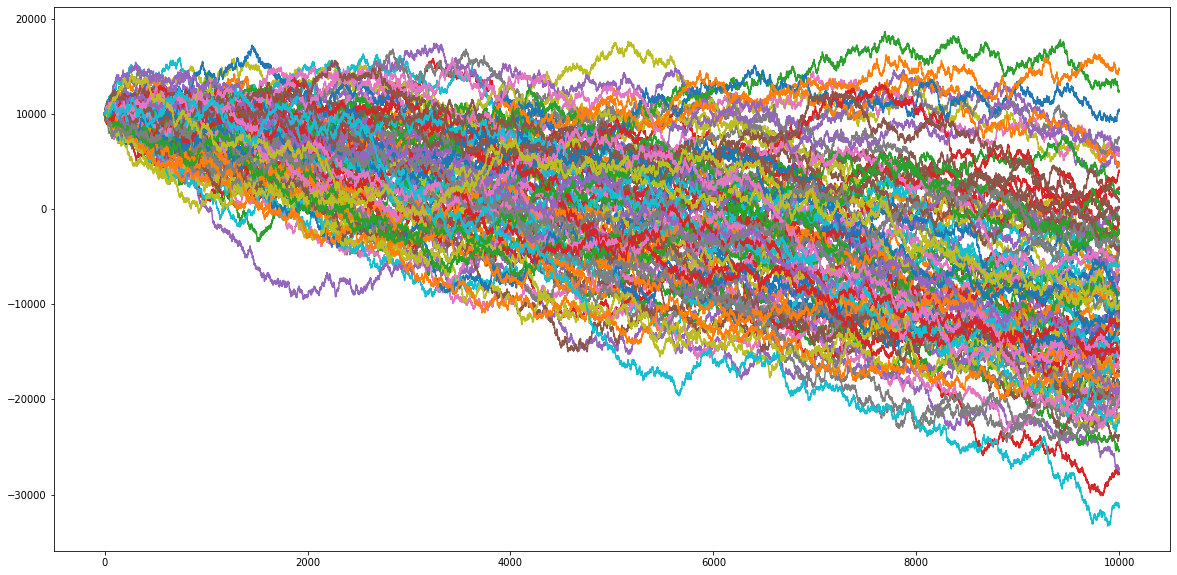

In [8]:
total_broke_count = 0
counter = 0 
plt.figure(figsize=(20,10))
while counter<100:
    wX,vY,broke_count=simple_bettor(10000,100,10000)
    total_broke_count += broke_count
    plt.plot(wX,vY)
    counter+=1
print('Death rate',total_broke_count/float(counter)*100)
print('Survive',100-total_broke_count/float(counter)*100)
plt.show()

Simple Death rate 83.39999999999999
Simple Survive 16.60000000000001
Double Death rate 96.3
Double Survive 3.700000000000003


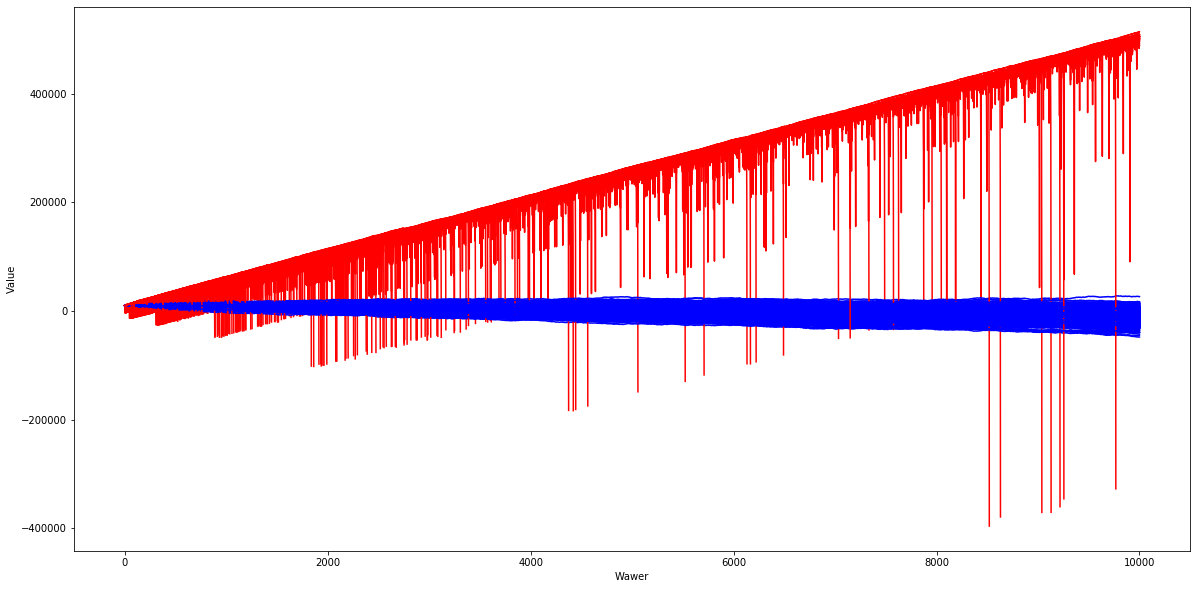

In [72]:
import matplotlib.pyplot as plt
sample_size = 1000
startingFunds = 10000
wagerSize = 100
counter = 0 
wagerCount = 10000
stotal_broke_count,btotal_broke_count = 0,0
scounter,bcounter = 0,0
plt.figure(figsize=(20,10))
while counter<sample_size:
    swX,svY,sbroke_count=simple_bettor(startingFunds,wagerSize,wagerCount)
    stotal_broke_count += sbroke_count
    plt.plot(swX,svY,'b')
    bwX,bvY,bbroke_count=double_bettor(startingFunds,wagerSize,wagerCount)    
    btotal_broke_count += bbroke_count  
    plt.plot(bwX,bvY,'r')
    counter+=1
    plt.ylabel('Value')
    plt.xlabel('Wawer')
print('Simple Death rate',stotal_broke_count/float(counter)*100)
print('Simple Survive',100-stotal_broke_count/float(counter)*100)
print('Double Death rate',btotal_broke_count/float(counter)*100)
print('Double Survive',100-btotal_broke_count/float(counter)*100)